# 11. 사이킷런으로 구현해 보는 머신러닝

## 11.1. 들어가며

## 11.2. 머신러닝과 알고리즘

## 11.3. 사이킷런에서 가이드하는 머신러닝 알고리즘

**Q4. 사이킷런에서 알고리즘의 Task는 몇 가지이며 각각 무엇인가요?**

classification(7개), clustering(6개), regression(7개), dimensionality reduction(5개) 총 25개

**Q6. 사이킷런에서 소개하는 Classification용 알고리즘은 몇 개이며 그 종류에는 무엇이 있나요?**

1. classification(7개)
 - SGD classifier
 - kernel approximation
 - linear SVC
 - Naive Bayes
 - Kneighbors Classifier
 - SVC
 - Ensemble Classifiers
2. clustering(6개)
 - KMeans
 - Spectral Clustering
 - GMM
 - MiniBatch KMeans
 - MeanShift
 - VBGMM

3. regression(7개)
 - SGD regression
 - Lasso
 - ElasticNet
 - RidgeRegression
 - SVR(kernel = 'linear')
 - SVR(kernel = 'rbf')
 - EnsembleRegression

4. dimensionality reduction(5개)
 - Randomized PCA
 - Isomap
 - Spectral Embedding
 - kernel approximation
 - LLE

## 11.4. Hello Scikit-learn

## 11.5. 사이킷런의 주요 모듈 (1) 데이터 표현법

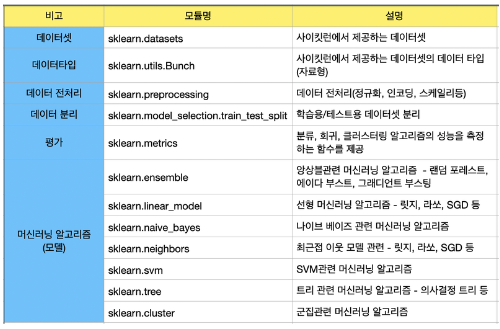

## 11.6. 사이킷런의 주요 모듈 (2) 회귀 모델 실습

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

 - `np.random.RandomState`는 10을 인자로 받고 있는데 여기서 10은 seed 값을 의미하는 듯하다.
 - `x`를 정의할 때에는 10을 인자로 받고 있는데, 이것은 차원의 개수이다
 - 기본적으로 `r.rand`는 $[0,1]$에서의 uniform distribution에서 숫자를 임의로 추출한다.
 - 즉 `x = 10 * r.rand(100)`는 $U[0,1]$에서 추출한 100개의 숫자로 만든 100차원 벡터이다.

In [ ]:
np.mean(x)

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

In [ ]:
print(type(model))

In [ ]:
X1 = x.reshape(100,1)
X2 = x.reshape(-1,1)
print(X1)
print(X2)
print(type(X1))
print(type(X2))
print(X1 == X2)
print(X1 is X2)

In [ ]:
X = X1
model.fit(X,y)

In [ ]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

In [ ]:
print(type(X))
print(X.shape)
print(X[0])

print(type(y))
print(y.shape)
print(y[0])

print(type(x_new))
print(x_new.shape)
print(x_new[0])

print(type(y_new))
print(y_new.shape)
print(y_new[0])


### 11.6.1. `mean_squared_error` 구현하기

[Scikit-learn: Mean Squared Error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [1,3]
y_pred = [2,1]
mean_squared_error(y_true, y_pred)

$$\frac{(1-2)^2+(3-1)^2}2=2.5$$

In [ ]:
y_true = [[1, 3], [4, 5], [5, 0]]
y_pred = [[2, 1], [4, 5], [5, 3]]
mean_squared_error(y_true, y_pred)

행렬 사이의 MSE는 frobenius norm의 형태의 MSE를 계산한다.
$$\text{y_true}=\begin{bmatrix}1&3\\4&5\\5&0\end{bmatrix}, \qquad\text{y_pred}=\begin{bmatrix}2&1\\4&5\\5&3\end{bmatrix}$$
$$\text{y_true}-\text{y_pred}=\begin{bmatrix}-1&2\\0&0\\0&-3\end{bmatrix}$$
$$\left|\left|\text{y_true}-\text{y_pred}\right|\right|_{\text{frobenius}}^2
=\frac{1+4+9}6=\frac73$$

직접 구현하기

In [ ]:
d = len(y_true)
y_true_np = np.array(y_true)
y_pred_np = np.array(y_pred)
np.sum(np.square(y_true_np-y_pred_np))/d

In [ ]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

In [ ]:
from sklearn.metrics import mean_squared_error
d = len(y_true)
y_true_np = np.array(y_true)
y_pred_np = np.array(y_pred)
error = np.sum(np.square(y_true_np-y_pred_np))/d

print(error)

## 11.7. 사이킷런의 주요 모듈 (3) datasets 모듈

### 11.7.1. `sklearn.utils.Bunch`

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
type(data)

`sklearn`의 `bunch`는 `python`의 `dict`와 유사해보인다. 그 차이는 무엇일지 아래에 코드로 확인해봤다.
결론은 <font color = red> 거의 같다. </font>

In [ ]:
D = {'a':0, 'b':1}
print(type(D))

In [ ]:
from sklearn.utils import Bunch
B = Bunch(c=2, d=3)
print(type(B))

(1) 값 호출의 두 가지 방법

In [ ]:
print(D['a'])
print(D['b'])
print(B['c'])
print(B['d'])

In [ ]:
# print(D.a) # error
# print(D.b) # error
print(B.c)
print(B.d)

(2) `keys`

In [ ]:
print(D.keys())
print(B.keys())
for key in D.keys():
    print(key)
for key in B.keys():
    print(key)

(3) `values`

In [ ]:
print(D.values)
print(B.values)
for value in D.values():
    print(value)
for value in B.values():
    print(value)

### 11.7.2. `wine` dataset 관찰

(생략)

## 11.8. 사이킷런의 주요 모듈 (4) 사이킷런 데이터셋을 이용한 분류 문제 실습

In [ ]:
import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
# feature matrix와 target vector 지정
X = data.data
y = data.target

# 모델 생성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# 훈련
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣습니다. 
print(classification_report(y, y_pred))
#정확도를 출력합니다. 
print("accuracy = ", accuracy_score(y, y_pred))


## 11.9. 사이킷런의 주요 모듈 (5) estimator

- 지도학습 (random forest)

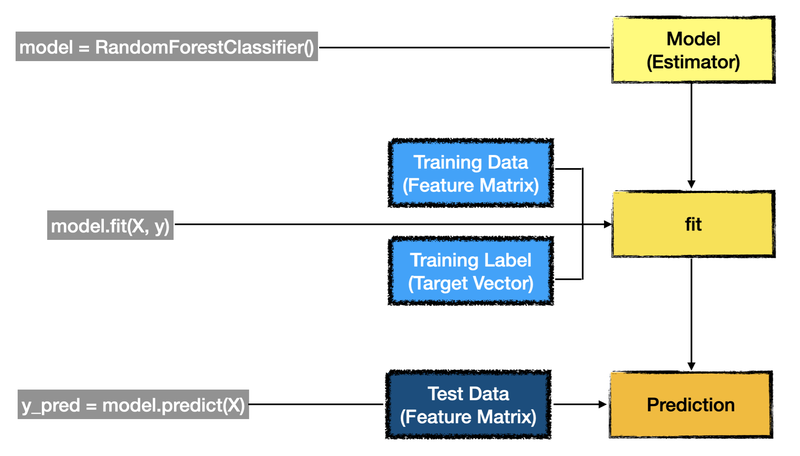

- 지도학습 (linear regression)

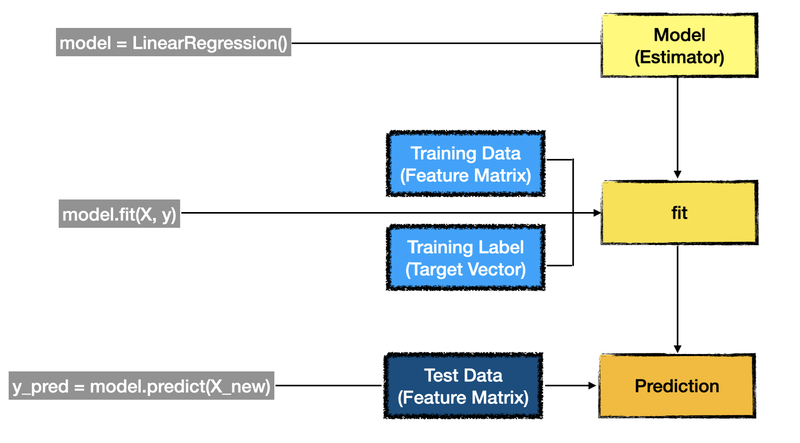

- 비지도학습 (principal component analysis)

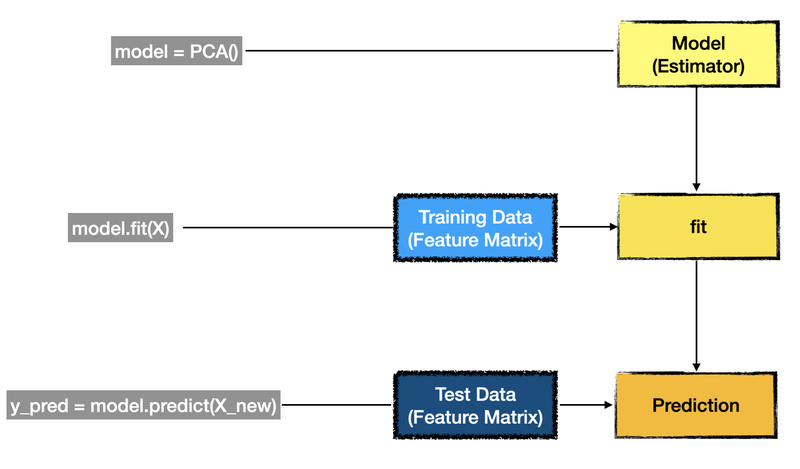

## 11.10. 훈련 데이터와 테스트 데이터

### 11.10.1. 데이터 나누기

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

In [ ]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

In [ ]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(type(result))
print(len(result))

In [ ]:
print(result[0].shape)
print(result[1].shape)
print(result[2].shape)
print(result[3].shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 11.10.2. 실습

내 코드

In [33]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 데이터셋 로드하기
data = load_wine()
X = data.data
y = data.target

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련하기
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
print("accuracy = ", accuracy_score(y_test, y_pred))


accuracy =  1.0


모범답안

In [17]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# 데이터셋 로드하기
data = load_wine()
# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
# 훈련하기
model = RandomForestClassifier()
model.fit(X_train, y_train)
# 예측하기
y_pred = model.predict(X_test)
# 정답률 출력하기
print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9722222222222222


내 코드는 정답률이 1로 나오고 모범답안은 정답률이 97%가 나오고 있다.
분명히 내가 뭘 잘못한 게 있다고 생각해서 조금 더 살펴보았다.

내 코드와 모범답안의 차이는 단지 `random_state`, 즉 시드를 지정해주느냐 안해주느냐의 차이이다.
시드는 42로 설정되어 있는데 다른 시드값 1을 넣으면 정답률이 1이 나오지 않는다.

In [34]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 데이터셋 로드하기
data = load_wine()
X = data.data
y = data.target

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 훈련하기
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
print("accuracy = ", accuracy_score(y_test, y_pred))


accuracy =  0.9722222222222222


for문으로 돌려보기 위해 함수를 하나 지정하고,

In [27]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def wine_iteration(n):
    # 데이터셋 로드하기
    data = load_wine()
    X = data.data
    y = data.target

    # 훈련용 데이터셋 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)

    # 훈련하기
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # 예측하기
    y_pred = model.predict(X_test)

    # 정답률 출력하기
    print("accuracy = ", accuracy_score(y_test, y_pred))

In [35]:
wine_iteration(42)
wine_iteration(1)

accuracy =  1.0
accuracy =  0.9722222222222222


for문을 돌리면

In [40]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for n in range(100):
    print("seed number :",n,wine_iteration(n))

accuracy =  0.9722222222222222
seed number : 0 None
accuracy =  0.9722222222222222
seed number : 1 None
accuracy =  1.0
seed number : 2 None
accuracy =  0.9722222222222222
seed number : 3 None
accuracy =  1.0
seed number : 4 None
accuracy =  1.0
seed number : 5 None
accuracy =  0.9722222222222222
seed number : 6 None
accuracy =  1.0
seed number : 7 None
accuracy =  1.0
seed number : 8 None
accuracy =  1.0
seed number : 9 None
accuracy =  0.9166666666666666
seed number : 10 None
accuracy =  0.9722222222222222
seed number : 11 None
accuracy =  0.9722222222222222
seed number : 12 None
accuracy =  1.0
seed number : 13 None
accuracy =  1.0
seed number : 14 None
accuracy =  1.0
seed number : 15 None
accuracy =  0.9722222222222222
seed number : 16 None
accuracy =  1.0
seed number : 17 None
accuracy =  0.9444444444444444
seed number : 18 None
accuracy =  0.9444444444444444
seed number : 19 None
accuracy =  1.0
seed number : 20 None
accuracy =  1.0
seed number : 21 None
accuracy =  0.9722222222

In [38]:
len(X)

178

$$0.972 = \frac k{178}$$
$$k \approx 0.972 \times{178}=173.016$$
정확도가 0.972가 나올 때에는 3개 말고는 다 맞춘다는 뜻이다.

조금 더 보기 쉽게 만들기 위해서 새로 함수를 구성하고 for문을 돌리면

In [41]:
def wine_iteration2(n):
    # 데이터셋 로드하기
    data = load_wine()
    X = data.data
    y = data.target

    # 훈련용 데이터셋 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)

    # 훈련하기
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # 예측하기
    y_pred = model.predict(X_test)

    # 정답률 출력하기
    return accuracy_score(y_test, y_pred)

In [70]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for n in range(100):
    print("seed number : {0:>3}, accuracy : {1:5.4f}".format(n,wine_iteration2(n)))

seed number :   0, accuracy : 0.9722
seed number :   1, accuracy : 0.9722
seed number :   2, accuracy : 0.9722
seed number :   3, accuracy : 0.9722
seed number :   4, accuracy : 1.0000
seed number :   5, accuracy : 1.0000
seed number :   6, accuracy : 0.9722
seed number :   7, accuracy : 1.0000
seed number :   8, accuracy : 1.0000
seed number :   9, accuracy : 1.0000
seed number :  10, accuracy : 0.9167
seed number :  11, accuracy : 0.9722
seed number :  12, accuracy : 0.9722
seed number :  13, accuracy : 1.0000
seed number :  14, accuracy : 1.0000
seed number :  15, accuracy : 1.0000
seed number :  16, accuracy : 1.0000
seed number :  17, accuracy : 1.0000
seed number :  18, accuracy : 0.9722
seed number :  19, accuracy : 0.9444
seed number :  20, accuracy : 1.0000
seed number :  21, accuracy : 1.0000
seed number :  22, accuracy : 0.9722
seed number :  23, accuracy : 1.0000
seed number :  24, accuracy : 0.9722
seed number :  25, accuracy : 0.9722
seed number :  26, accuracy : 1.0000
s

## 11.11. 마무리